<a href="https://colab.research.google.com/github/tayfundaldik/ML-Projects/blob/main/TayfunML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
dataset_cols = ["Bike_Count", "Hour", "Temp", "Humidity", "Wind", "Visibility", "dew_pt_temp", "Radiation", "Rain", "Snow", "Functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis =1)


In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols
df.head()

,Bike_Count,Hour,Temp,Humidity,Wind,Visibility,dew_pt_temp,Radiation,Rain,Snow,Functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [5]:
df["Functional"] = (df["Functional"] == "Yes").astype(int)
df=df[df["Hour"]==12]
df = df.drop(["Hour"],axis =1 )
df.head()

,Bike_Count,Temp,Humidity,Wind,Visibility,dew_pt_temp,Radiation,Rain,Snow,Functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


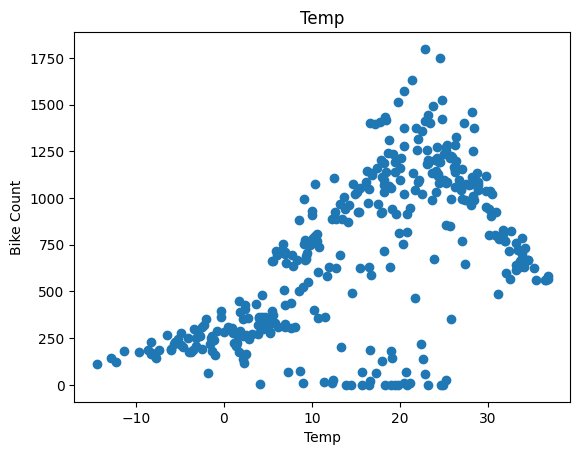

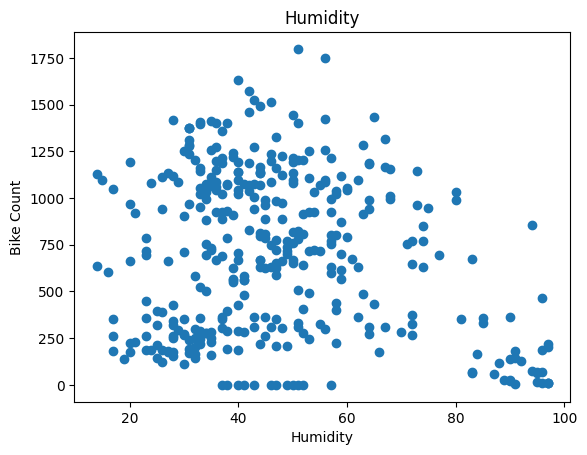

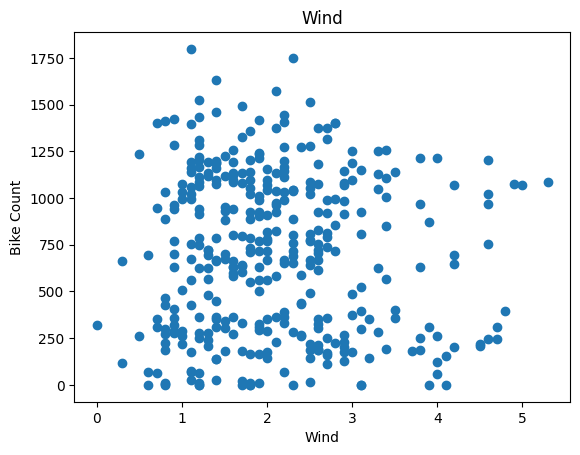

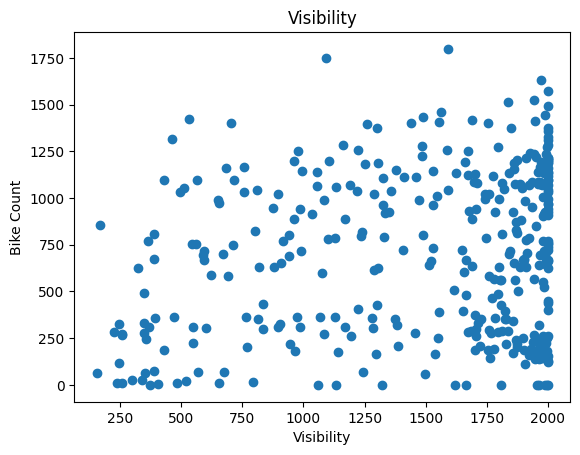

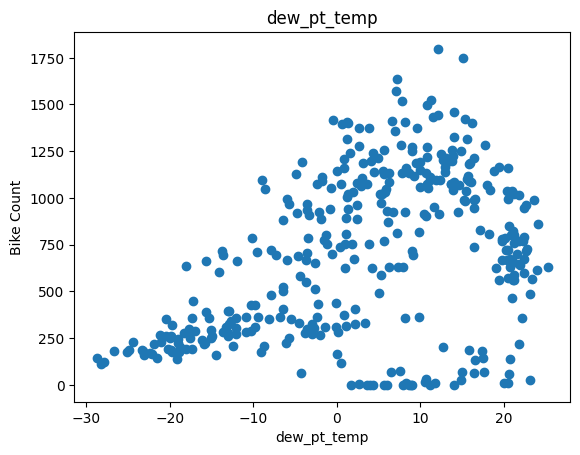

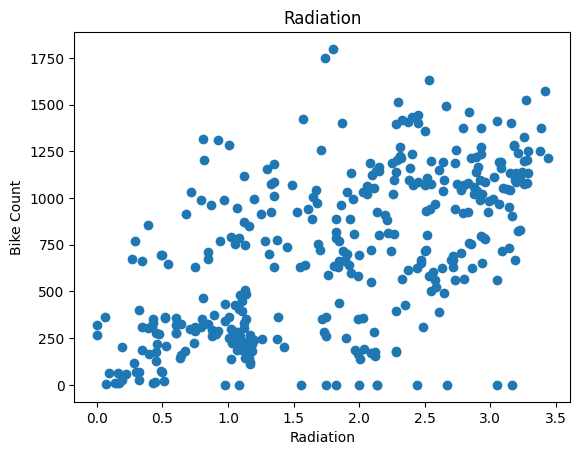

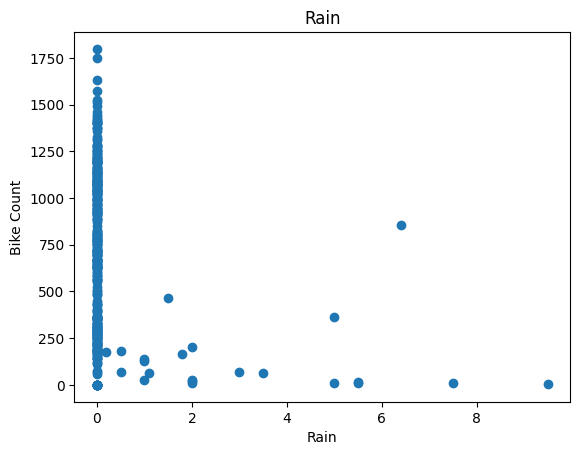

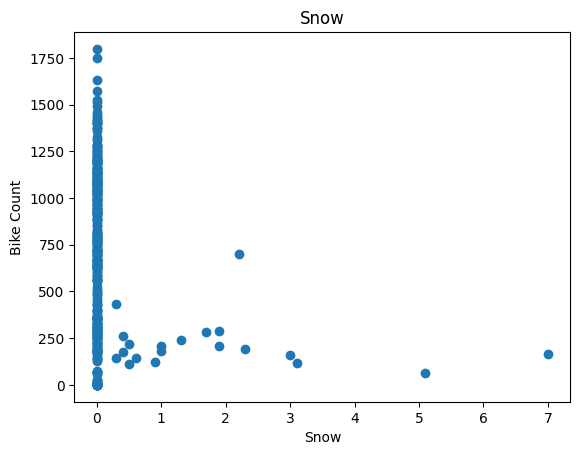

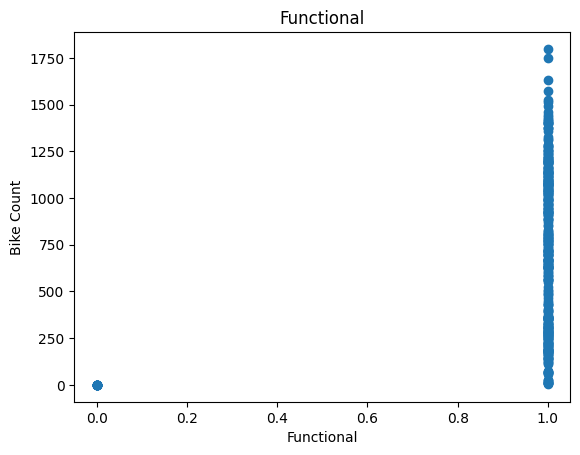

In [6]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["Bike_Count"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Bike Count")
  plt.show()

In [7]:
df =df.drop(["Wind", "Visibility", "Functional"], axis=1)
df.head()

,Bike_Count,Temp,Humidity,dew_pt_temp,Radiation,Rain,Snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [8]:
def get_xy(dataframe, y_label, x_labels= None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[kopy for kopy in dataframe.columns if kopy != y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))
  return data,x,y

In [22]:
train,valid,test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

_,x_train_temp,y_train_temp = get_xy(train, "Bike_Count", x_labels=["Temp"])
_,x_valid_temp,y_valid_temp = get_xy(valid, "Bike_Count", x_labels=["Temp"])
_,x_test_temp,y_test_temp = get_xy(test, "Bike_Count", x_labels=["Temp"])

#Linear Regression

In [10]:
temp_regressor = LinearRegression()
temp_regressor.fit(x_train_temp, y_train_temp)
temp_regressor.score(x_train_temp, y_train_temp)

0.3424894713706912

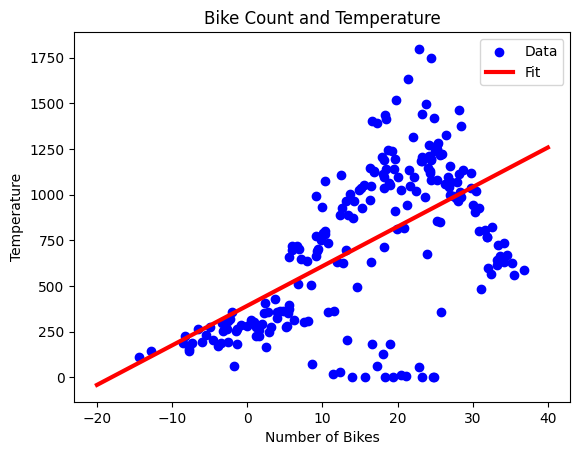

In [11]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x=tf.linspace(-20, 40, 100)
plt.plot(x, temp_regressor.predict(np.array(x).reshape(-1,1)),label="Fit", color="red", linewidth=3)
plt.title("Bike Count and Temperature")
plt.xlabel("Number of Bikes")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [99]:
train,valid,test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_,x_train,y_train = get_xy(train, "Bike_Count", x_labels=df.columns[1:])
_,x_valid,y_valid = get_xy(valid, "Bike_Count", x_labels=df.columns[1:])
_,x_test,y_test = get_xy(test, "Bike_Count", x_labels=df.columns[1:])

In [86]:
all_reg =LinearRegression()
all_reg.fit(x_train, y_train)
all_reg.score(x_train, y_train)
y_predict = all_reg.predict(x_train)

#Linear Regression with Neural Network

In [23]:
temp_norm = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_norm.adapt(x_train_temp.reshape(-1))

In [24]:
def plot_loss(history):
  plt.plot(history.history["loss"], label="Loss")
  plt.plot(history.history["val_loss"], label='Validation Loss')
  plt.xlabel("Epoch")
  plt.ylabel("MSE")
  plt.legend()
  plt.grid(True)
  plt.show()

In [18]:
temp_nn_model = tf.keras.Sequential([
    temp_norm,
    tf.keras.layers.Dense(1)
])

In [21]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss="mean_squared_error")

In [26]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1),y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data= (x_valid_temp, y_valid_temp)
)

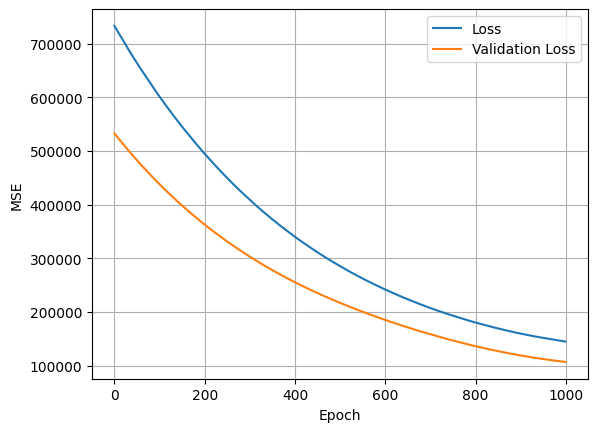

In [27]:
plot_loss(history)

4/4 [==============================] - 0s 7ms/step


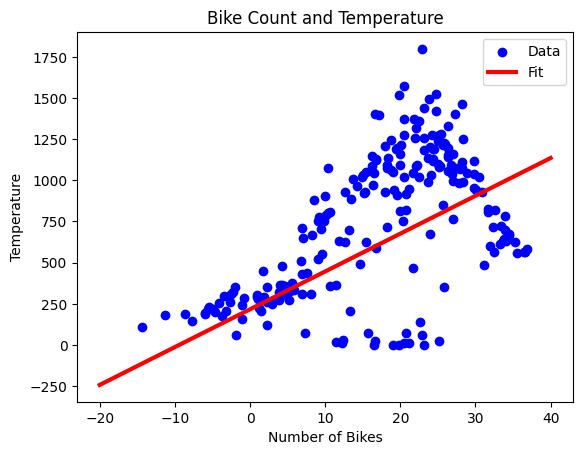

In [28]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x=tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit", color="red", linewidth=3)
plt.title("Bike Count and Temperature")
plt.xlabel("Number of Bikes")
plt.ylabel("Temperature")
plt.legend()
plt.show()

#Multiple Linear Regression with NN

In [54]:
all_norm = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_norm.adapt(x_train)

In [59]:
nn_model = tf.keras.Sequential([
    all_norm,
    tf.keras.layers.Dense(1)
])

In [60]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss="mean_squared_error")

In [61]:
history = nn_model.fit(
    x_train,y_train,
    verbose=0,
    epochs=1000,
    validation_data= (x_valid, y_valid)
)

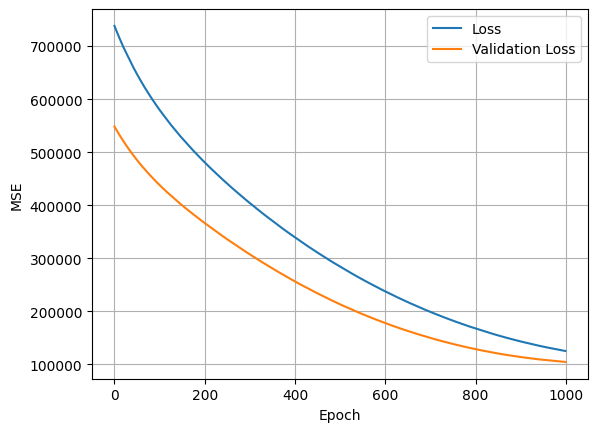

In [62]:
plot_loss(history)

#Regression with Neural Networks

In [111]:
all_norm = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_norm.adapt(x_train)

In [103]:
nn_model = tf.keras.Sequential([
    all_norm,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error")

In [104]:
history = nn_model.fit(
    x_train,y_train,
    verbose=0,
    epochs=100,
    validation_data= (x_valid, y_valid)
)

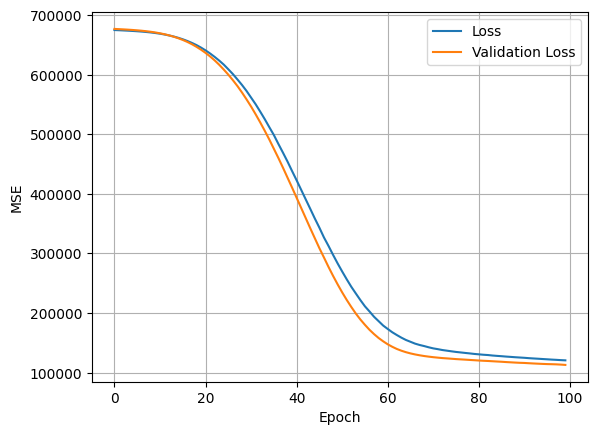

In [105]:
plot_loss(history)

#MSE Comparison

In [113]:
y_predict= all_reg.predict(x_test)
y_predict_nn = nn_model.predict(x_test)

3/3 [==============================] - 0s 5ms/step


In [114]:
def MSE( y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [116]:
MSE(y_predict, y_test)

83868.97751256618

In [117]:
MSE(y_predict_nn,y_test)

117804.90439369611

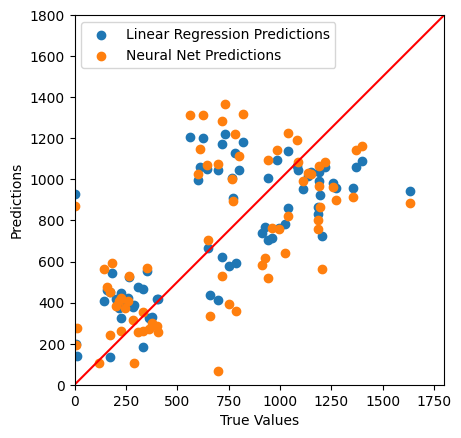

In [119]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test, y_predict, label = "Linear Regression Predictions")
plt.scatter(y_test,y_predict_nn, label = "Neural Net Predictions")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lim = [0,1800]
plt.xlim(lim)
plt.ylim(lim)
plt.legend()
z = plt.plot(lim,lim,c="red")